# Sadržaj

- [<i>Perceptron</i>](#perceptron)
- [<i>SGDClassifier</i>](#sgdclassifier)
- [<i>LogisticRegression</i>](#logisticregression)
- [<i>SVC</i>](#svc)
- [<i>DecisionTreeClassifier</i>](#decisiontreeclassifier)
- [<i>RandomForestClassifier</i>](#randomforestclassifier)

## Korištenje klase <i><font color="red">Perceptron</font></i> <a id="perceptron"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import Perceptron

In [3]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

podaci_vino = datasets.load_wine()
podaci, oznake = podaci_vino.data[:,[0,1,11]], podaci_vino.target
podaci_tren, podaci_test, oznake_tren, oznake_test = train_test_split(podaci, oznake, test_size=0.2,
                                                                      stratify=oznake, random_state=1)

<li>Korištenje klase <i>StandardScaler</i> (više u 2. pogalavlju, 1. dio)</li>

In [4]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
podaci_tren_std = std.fit_transform(podaci_tren)
podaci_test_std = std.transform(podaci_test)

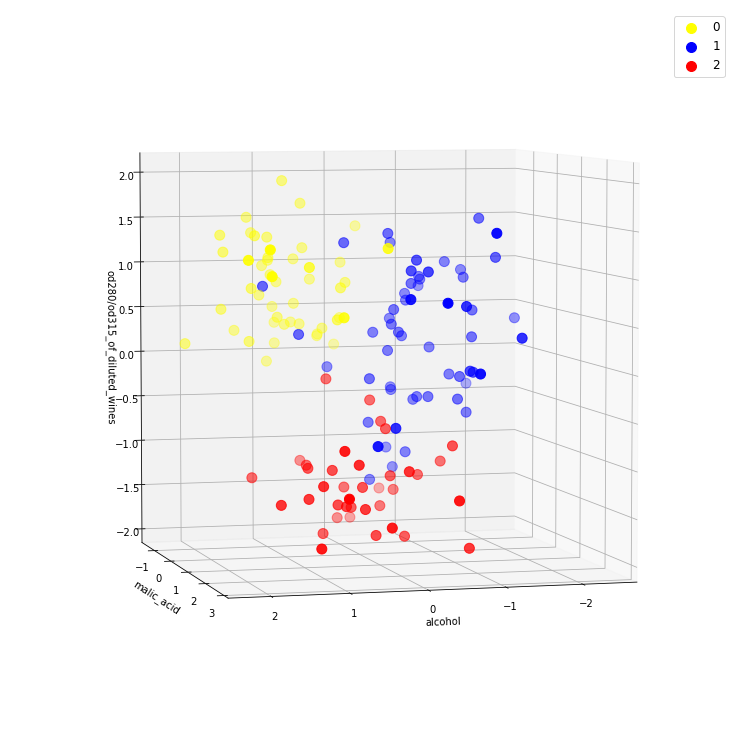

In [5]:
boje = ['yellow', 'blue', 'red']
def prikaz3d(podaci, oznake, labele):
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure(figsize=(10,10))
    ax = Axes3D(fig)
    for oznaka, boja in zip(np.unique(oznake), boje):
        ax.scatter(podaci[oznake==oznaka, 0], podaci[oznake==oznaka, 1], podaci[oznake==oznaka, 2],
                   c=boja, label=oznaka, marker='o', s=100)
    ax.set_xlabel(labele[0])
    ax.set_ylabel(labele[1])
    ax.set_zlabel(labele[2])
    plt.legend(loc='best', prop={'size': 12})
    ax.view_init(5, 75)
    plt.show()
prikaz3d(podaci_tren_std, oznake_tren, ('alcohol', 'malic_acid', 'od280/od315_of_diluted_wines'))

In [6]:
perceptron = Perceptron(max_iter=8, eta0=0.1)

In [7]:
perceptron.fit(podaci_tren_std, oznake_tren)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      max_iter=8, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [8]:
podaci_pred = perceptron.predict(podaci_test_std)

In [9]:
print(f'Accuracy: {np.round(perceptron.score(podaci_test_std, oznake_test), 3)}')

Accuracy: 0.889


In [10]:
def izracun_granica(podaci, klasifikator, rez):

    x1_min, x1_max = podaci[:, 0].min() - 1, podaci[:, 0].max() + 1
    x2_min, x2_max = podaci[:, 1].min() - 1, podaci[:, 1].max() + 1
    x3_min, x3_max = podaci[:, 2].min() - 1, podaci[:, 2].max() + 1
    
    xx1, xx2, xx3 = np.meshgrid(np.arange(x1_min, x1_max, rez),
                                np.arange(x2_min, x2_max, rez),
                                np.arange(x3_min, x3_max, rez))
    boje = klasifikator.predict(np.array([xx1.ravel(), xx2.ravel(), xx3.ravel()]).T)
    boje = boje.reshape(xx1.shape)
    return xx1, xx2, xx3, boje

xx1, xx2, xx3, boje = izracun_granica(podaci_tren_std, perceptron, rez=0.1)

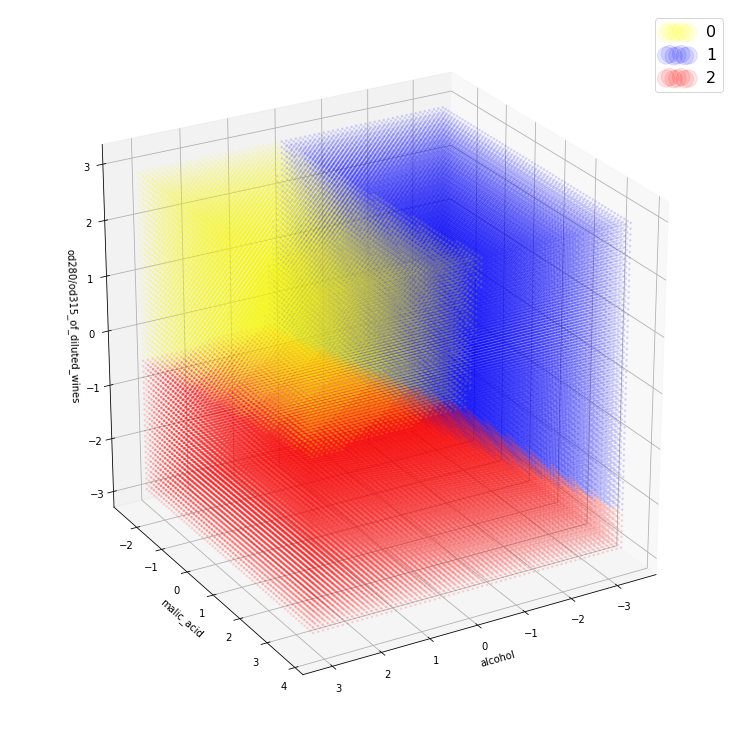

In [11]:
from mpl_toolkits.mplot3d import Axes3D
def prikaz_granica3d(xx1, xx2, xx3, boje, b, labele):
    fig = plt.figure(figsize=(10,10))
    ax = Axes3D(fig)
    for i in range(0, len(np.unique(boje))):
        ax.scatter(xx1[boje==i], xx2[boje==i], xx3[boje==i], c=b[i], marker='o', s=3, label=i, alpha=0.1)
    ax.set_xlabel(labele[0])
    ax.set_ylabel(labele[1])
    ax.set_zlabel(labele[2])
    plt.legend(loc="upper right", scatterpoints=7, markerscale=10.0, fontsize=10, prop={'size': 16})
    ax.view_init(25, 60)
    plt.show()

b = {0:'yellow', 1:'blue', 2:'red'}
labele = ('alcohol', 'malic_acid', 'od280/od315_of_diluted_wines')
prikaz_granica3d(xx1, xx2, xx3, boje, b, labele)

In [12]:
tezine = pd.DataFrame(np.hstack((perceptron.intercept_.reshape(3,1), perceptron.coef_)), columns=[f'w{i}' for i in range(4)])
tezine

w0        w1        w2        w3
0 -0.3  0.298337  0.006446  0.301752
1 -0.1 -0.341216 -0.044744  0.223966
2 -0.3  0.242895  0.091031 -0.520947

## Korištenje klase <i><font color="red">SGDClassifier</font></i> <a id="sgdclassifier"></a>

In [13]:
from sklearn.linear_model import SGDClassifier

<li>Korištenje klase za online učenje metodom <i>partial_fit</i></li>

In [14]:
sgdc = SGDClassifier(loss='perceptron', eta0=0.1, max_iter=8)

In [15]:
sgdc.partial_fit(podaci_tren_std[:71,:], oznake_tren[:71], classes=(0,1,2))

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.1, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='perceptron', max_iter=8, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [16]:
print(f'Accuracy: {np.round(sgdc.score(podaci_test_std, oznake_test), 3)}')

Accuracy: 0.917


In [17]:
sgdc.partial_fit(podaci_tren_std[71:,:], oznake_tren[71:])

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.1, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='perceptron', max_iter=8, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [18]:
print(f'Accuracy: {np.round(sgdc.score(podaci_test_std, oznake_test), 3)}')

Accuracy: 0.861


## Korištenje klase <i><font color="red">LogisticRegression</font></i> <a id="logisticregression"></a>

In [19]:
from matplotlib.colors import ListedColormap
def prikaz2d(podaci, oznake, klasifikator, rez=0.01):
    markeri = ['s', '^', 'o']
    boje = ['red', 'blue', 'yellow']
    cmap = ListedColormap(boje[:len(np.unique(oznake))])
    x1_min, x1_max = podaci[:, 0].min() - 1, podaci[:, 0].max() + 1
    x2_min, x2_max = podaci[:, 1].min() - 1, podaci[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, rez), np.arange(x2_min, x2_max, rez))
    xx3 = klasifikator.predict(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
    plt.figure(figsize=(10,8))
    plt.contourf(xx1, xx2, xx3, alpha=0.2, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(oznake)):
        plt.scatter(x=podaci[oznake == cl, 0], y=podaci[oznake == cl, 1], alpha=0.8, c=boje[idx],
                    marker=markeri[idx], label=cl, edgecolor='black')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend(loc='best')
    plt.show()

In [20]:
podaci, oznake = datasets.make_classification(n_samples=300, n_features=2, n_informative=2, n_redundant=0, flip_y=0.11,
                                              n_classes=2, class_sep=0.9)
podaci_tren, podaci_test, oznake_tren, oznake_test = train_test_split(podaci, oznake, test_size=0.3,
                                                                      stratify=oznake, random_state=1)

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
lr = LogisticRegression(max_iter=1, penalty='l2', C=0.1)

In [23]:
lr.fit(podaci_tren, oznake_tren)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [24]:
lr.score(podaci_test, oznake_test)

0.8888888888888888

<li>Grafički prikaz granice odlučivanja za podatke za treniranje i testiranje</li>

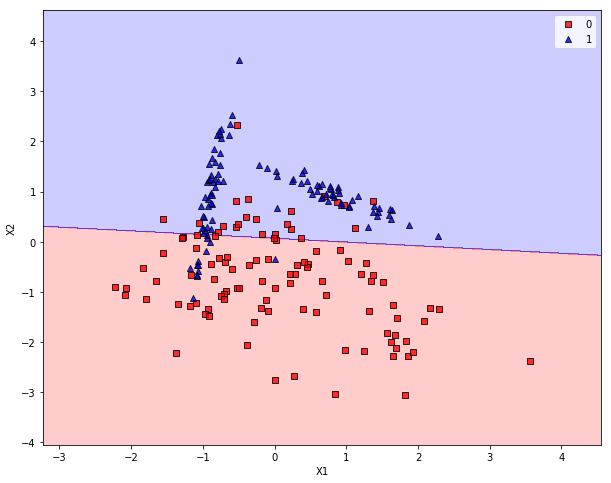

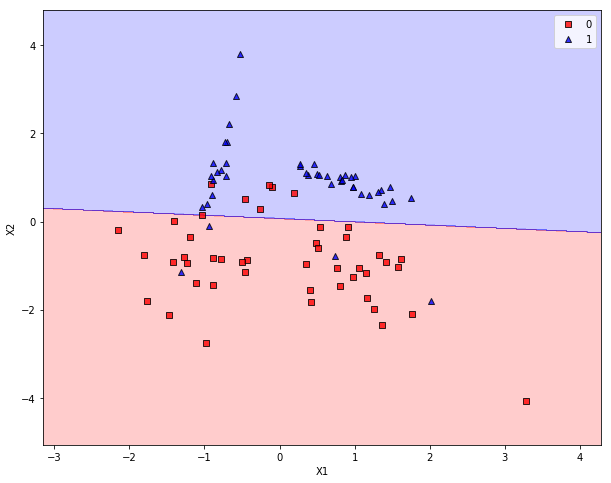

In [25]:
prikaz2d(podaci_tren, oznake_tren, lr), prikaz2d(podaci_test, oznake_test, lr);

<li>Vjerojatnost pripadanja testnih uzoraka klasama 0 i 1</li>

In [26]:
df = pd.DataFrame(lr.predict_proba(podaci_test), columns=('klasa 0', 'klasa 1'))
df.head(5)

klasa 0   klasa 1
0  0.915596  0.084404
1  0.212986  0.787014
2  0.104119  0.895881
3  0.836910  0.163090
4  0.831008  0.168992

In [27]:
sd = lr.predict(podaci_test)

In [28]:
print(sd[:5])

[0 1 1 0 0]


## Korištenje klase <i><font color="red">SVC</font></i> <a id="svc"></a>

In [33]:
podaci, oznake = datasets.make_classification(n_samples=1000, n_features=3, n_informative=3, n_redundant=0, flip_y=0.01,
                                              n_classes=3, class_sep=0.95, n_clusters_per_class=2)
podaci_tren, podaci_test, oznake_tren, oznake_test = train_test_split(podaci, oznake, test_size=0.2,
                                                                      stratify=oznake, random_state=1)

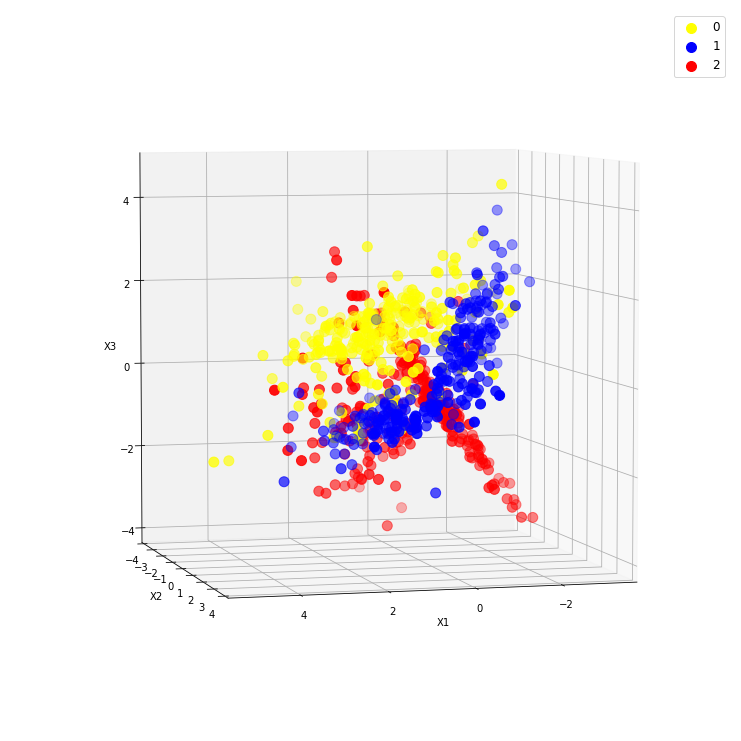

In [34]:
boje = ['yellow', 'blue', 'red']
prikaz3d(podaci_tren, oznake_tren, ('X1', 'X2', 'X3'))

In [35]:
from sklearn.svm import SVC

In [36]:
svc = SVC()

<li>Odabir najboljeg modela pomoću klase <i>GridSearchCV</i> (detaljnije u 3. poglavlju)</li>

In [37]:
from sklearn.model_selection import GridSearchCV
raspon = [0.01, 0.1, 1.0, 10.0, 100.0]
mogucnosti = [{'C': raspon, 'kernel': ['linear']},
              {'C': raspon, 'gamma': raspon, 'kernel': ['rbf']}]
gs = GridSearchCV(estimator=svc, param_grid=mogucnosti, scoring='accuracy',
                  cv=10, n_jobs=-1, verbose=True, return_train_score=True)

In [38]:
gs.fit(podaci_tren, oznake_tren)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    4.6s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'C': [0.01, 0.1, 1.0, 10.0, 100.0], 'kernel': ['linear']}, {'C': [0.01, 0.1, 1.0, 10.0, 100.0], 'gamma': [0.01, 0.1, 1.0, 10.0, 100.0], 'kernel': ['rbf']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=True)

In [39]:
gs.score(podaci_test, oznake_test)

0.885

In [40]:
gs.best_params_

{'C': 10.0, 'gamma': 0.1, 'kernel': 'rbf'}

In [41]:
svc = gs.best_estimator_

In [42]:
b = {0:'yellow', 1:'blue', 2:'red'}
labele = ('X1', 'X2', 'X3')
xx1, xx2, xx3, boje = izracun_granica(podaci_tren, svc, rez=0.1)

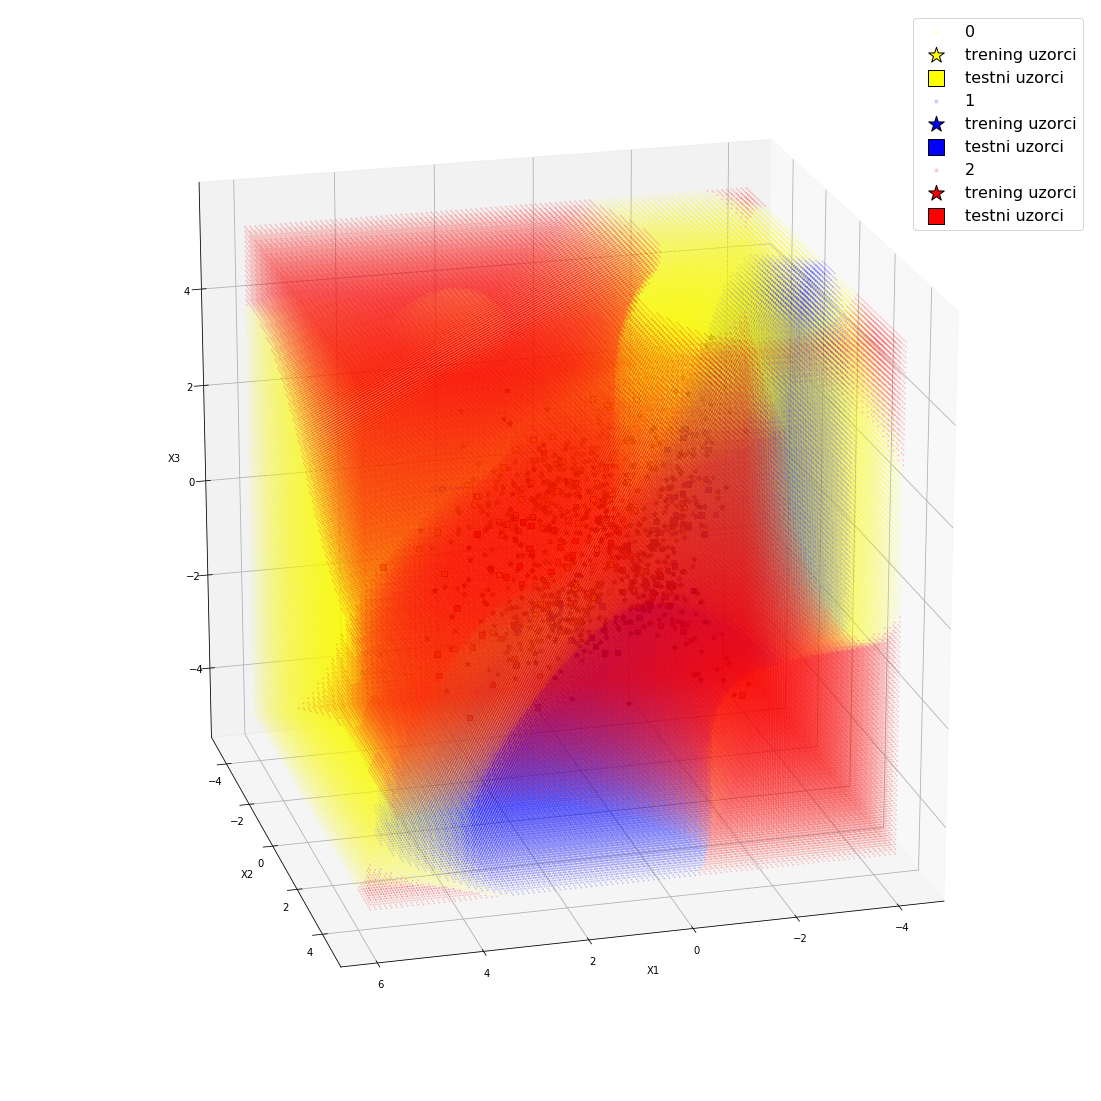

In [43]:
def prikaz3d_svi(xx1, xx2, xx3, boje, b, labele, podaci_tren, oznake_tren, podaci_test, oznake_test):
    fig = plt.figure(figsize=(15,15))
    ax = Axes3D(fig)
    for i in range(0, len(np.unique(boje))):
        ax.scatter(xx1[boje==i], xx2[boje==i], xx3[boje==i], c=b[i], marker='o', s=1, label=i, alpha=0.15)
        ax.scatter(podaci_tren[oznake_tren==i,0], podaci_tren[oznake_tren==i,1], podaci_tren[oznake_tren==i,2],
                   c=b[i], marker='*', edgecolors='black', s=30, label='trening uzorci')
        ax.scatter(podaci_test[oznake_test==i,0], podaci_test[oznake_test==i,1], podaci_test[oznake_test==i,2],
                   c=b[i], marker='s', edgecolors='black', s=30, label='testni uzorci')
    ax.set_xlabel(labele[0])
    ax.set_ylabel(labele[1])
    ax.set_zlabel(labele[2])
    plt.legend(loc="upper right", markerscale=3.0, fontsize=10, prop={'size': 16})
    ax.view_init(20, 75)
    plt.show()

prikaz3d_svi(xx1, xx2, xx3, boje, b, labele, podaci_tren, oznake_tren, podaci_test, oznake_test)

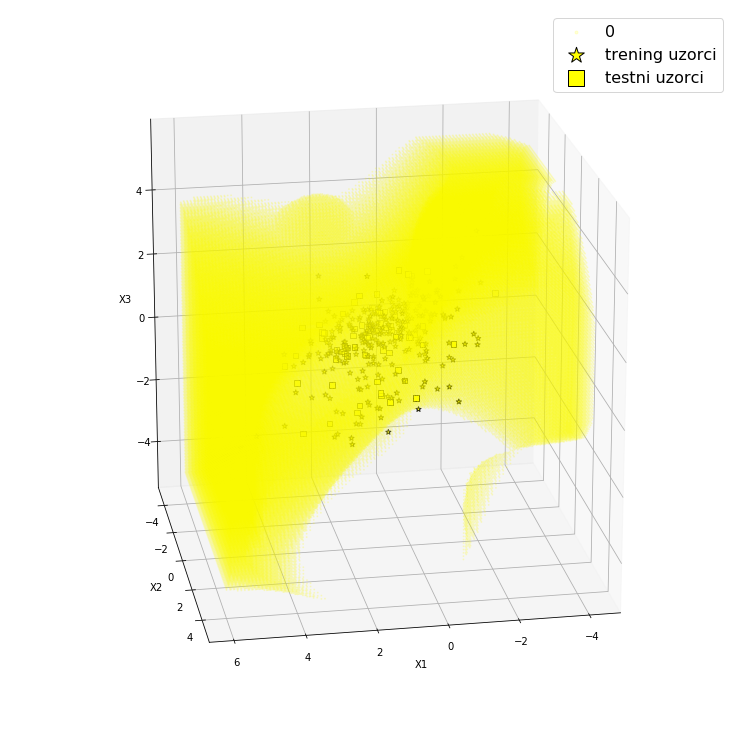

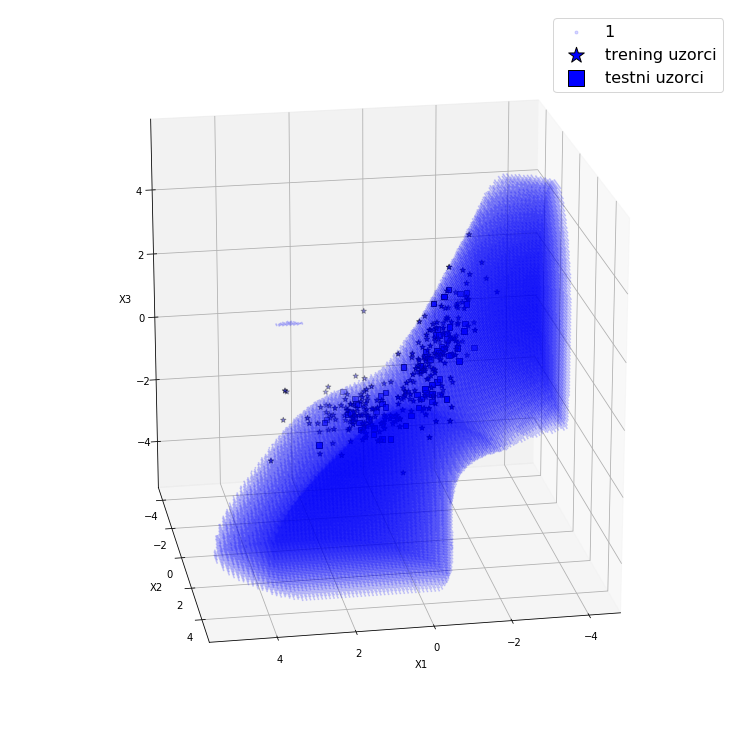

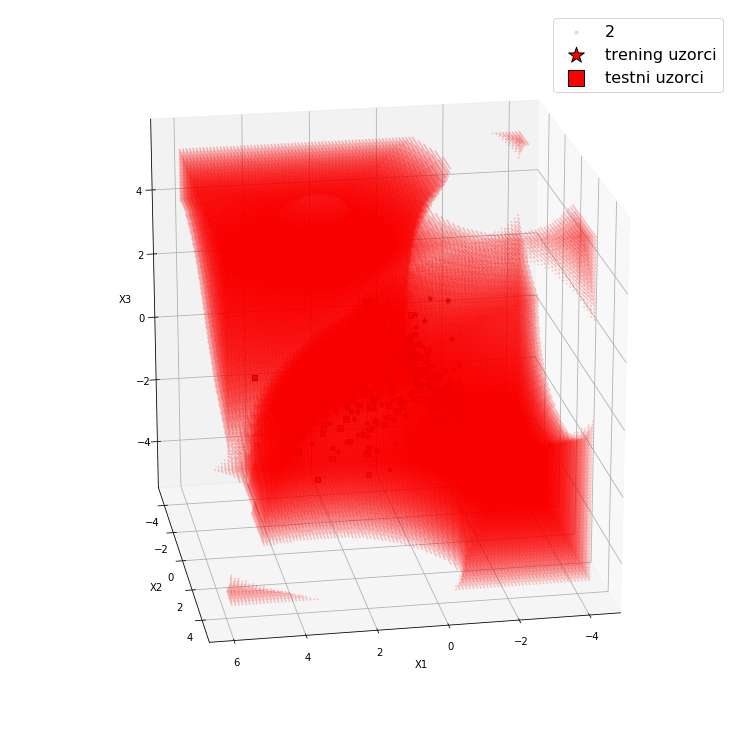

In [44]:
for i in range(0, len(np.unique(boje))):
    fig = plt.figure(figsize=(10,10))
    ax = Axes3D(fig)
    ax.scatter(xx1[boje==i], xx2[boje==i], xx3[boje==i], c=b[i], marker='o', s=1, label=i, alpha=0.15)
    ax.scatter(podaci_tren[oznake_tren==i,0], podaci_tren[oznake_tren==i,1], podaci_tren[oznake_tren==i,2],
               c=b[i], marker='*', edgecolors='black', s=30, label='trening uzorci')
    ax.scatter(podaci_test[oznake_test==i,0], podaci_test[oznake_test==i,1], podaci_test[oznake_test==i,2],
               c=b[i], marker='s', edgecolors='black', s=30, label='testni uzorci')
    ax.set_xlabel(labele[0])
    ax.set_ylabel(labele[1])
    ax.set_zlabel(labele[2])
    plt.legend(loc="upper right", markerscale=3.0, fontsize=10, prop={'size': 16})
    ax.view_init(20, 80)
    plt.show()

## Korištenje klase <i><font color="red">DecisionTreeClassifier</font></i> <a id="decisiontreeclassifier"></a>

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
podaci_vino = datasets.load_wine()
podaci, oznake = podaci_vino.data, podaci_vino.target
podaci_tren, podaci_test, oznake_tren, oznake_test = train_test_split(podaci, oznake, test_size=0.2,
                                                                      stratify=oznake, random_state=1)

In [47]:
df = pd.DataFrame(np.hstack((podaci,oznake.reshape(oznake.shape[0], 1))), columns=podaci_vino.feature_names + ['klasa'])
df.head(5)

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  klasa  
0                          3.92   1065.0    0.0  
1                          3.40   1050.0    0.0  
2                          3.17   1185.0    0.0  
3                          3.45   1480.0    0.0  
4                          2.93    735.0    0.0

In [48]:
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [49]:
dtc.fit(podaci_tren, oznake_tren)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [50]:
dtc.score(podaci_test, oznake_test)

0.8888888888888888

In [51]:
dtc.predict_proba(podaci_test)[:5]

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [52]:
print(dtc.predict(podaci_test)[:5])

[0 1 2 0 2]


<li>Prikaz stabla odlučivanja</li>

In [53]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
dot_data = export_graphviz(dtc, filled=True, rounded=True, class_names=list('012'),
                           feature_names=podaci_vino.feature_names, out_file=None)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png');

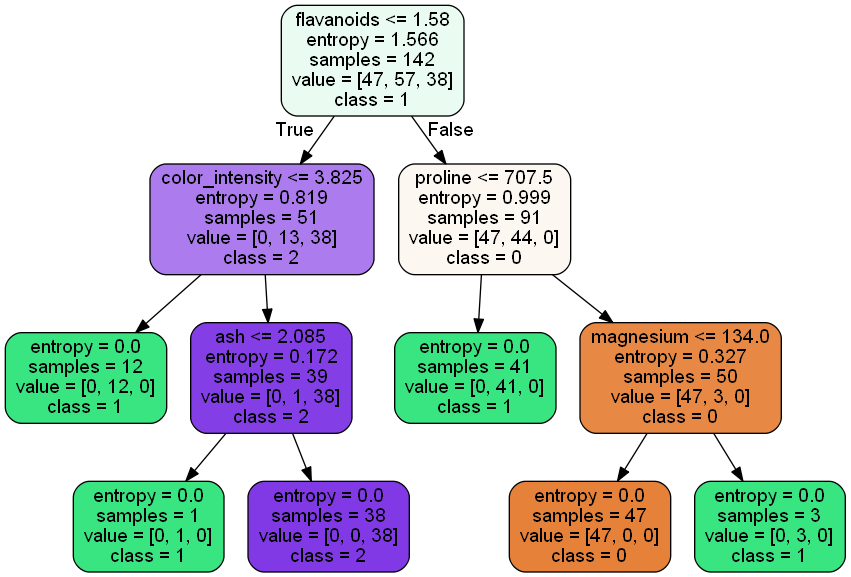

In [54]:
from IPython.display import Image
Image(filename='tree.png') 

In [61]:
podaci_vino = datasets.load_wine()
podaci, oznake = podaci_vino.data[:,[0,1,11]], podaci_vino.target
podaci_tren, podaci_test, oznake_tren, oznake_test = train_test_split(podaci, oznake, test_size=0.2,
                                                                      stratify=oznake, random_state=1)

<li>Karakteristične pravokutne granice između uzoraka različitih klasa</li>

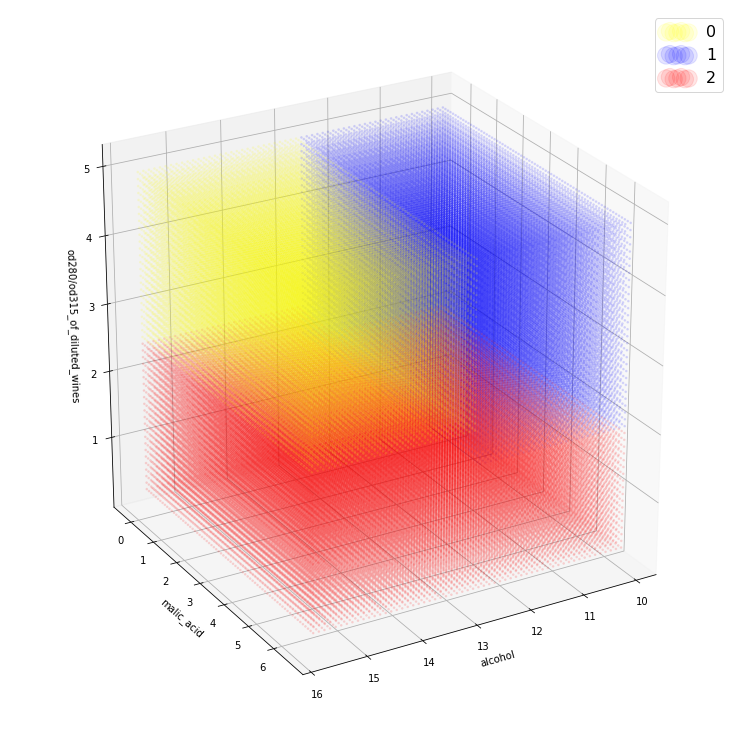

In [62]:
dtc = DecisionTreeClassifier(max_depth=2)
dtc.fit(podaci_tren, oznake_tren)

xx1, xx2, xx3, boje = izracun_granica(podaci_tren, dtc, rez=0.1)
b = {0:'yellow', 1:'blue', 2:'red'}
labele = ('alcohol', 'malic_acid', 'od280/od315_of_diluted_wines')

prikaz_granica3d(xx1, xx2, xx3, boje, b, labele)

## Korištenje klase <i><font color="red">RandomForestClassifier</font></i> <a id="randomforestclassifier"></a>

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
rfc = RandomForestClassifier(criterion='entropy')

mogucnosti = [{'n_estimators': range(1, 1001, 10)}]
gs = GridSearchCV(estimator=rfc, param_grid=mogucnosti, scoring='accuracy',
                  cv=10, n_jobs=-1, verbose=True, return_train_score=True)

gs.fit(podaci_tren, oznake_tren)
gs.score(podaci_test, oznake_test)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 307 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done 557 tasks      | elapsed:   43.1s
[Parallel(n_jobs=-1)]: Done 907 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  2.2min finished


0.8888888888888888

In [71]:
gs.best_params_

{'n_estimators': 61}

In [72]:
rfc = gs.best_estimator_

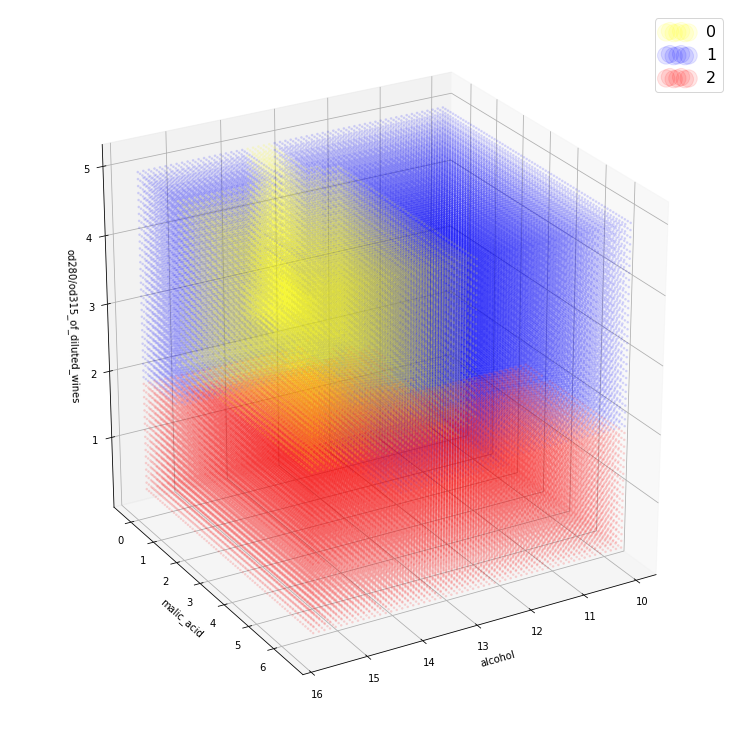

In [74]:
xx1, xx2, xx3, boje = izracun_granica(podaci_tren, rfc, rez=0.1)
b = {0:'yellow', 1:'blue', 2:'red'}
labele = ('alcohol', 'malic_acid', 'od280/od315_of_diluted_wines')

prikaz_granica3d(xx1, xx2, xx3, boje, b, labele)

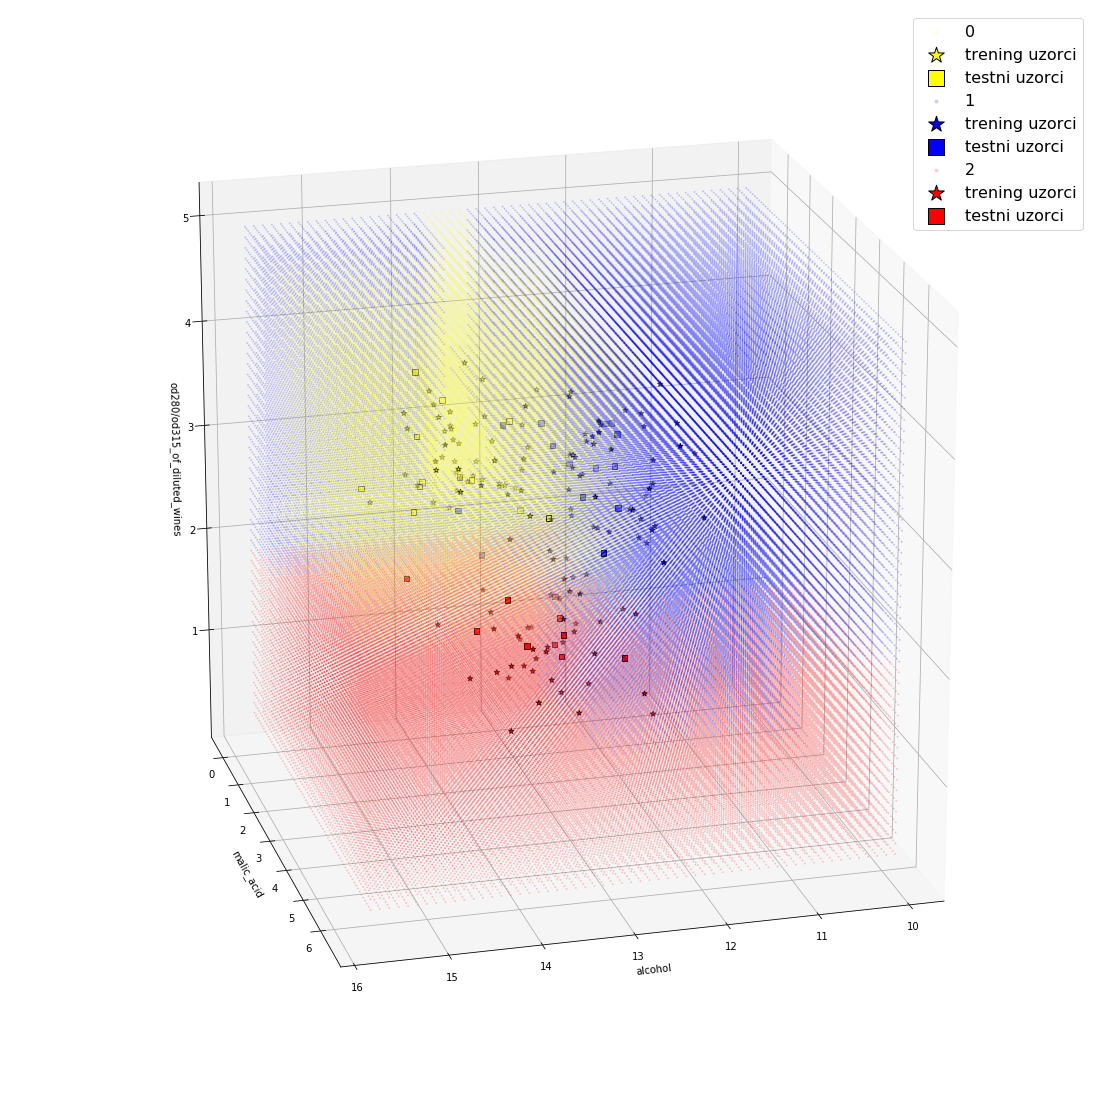

In [75]:
prikaz3d_svi(xx1, xx2, xx3, boje, b, labele, podaci_tren, oznake_tren, podaci_test, oznake_test)